In [145]:
%matplotlib notebook

In [146]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for Chart and plot
import math # for floor function 

# File to Load 
city_data_to_load = "raw_data/city_data.csv"
ride_data_to_load = "raw_data/ride_data.csv"

# Read City and Ride Data File and store into Pandas Data Frames
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# # Combine the data into a single dataset
city_ride_data_complete = pd.merge(city_data, ride_data, how="inner", on=["city", "city"])
# city_ride_data_complete

In [147]:
# Calculating $ Displaying Average Fare, date, Total Number of Rides, Total Number of Drivers based on City Type
rides_analysis = city_ride_data_complete
rides_analysis['rides'] = 0 
rides_analysis['drivers'] = 0
rides_analysis = rides_analysis.groupby(['city']).agg({'fare':'mean'
                                   ,'date':'min'
                                   , 'rides':'size'
                                   ,'driver_count':'max'               
                                   ,'type':'min'})
rides_analysis = rides_analysis.rename(columns = {'fare' :'Average Fare'
                                 ,'rides' : 'Total Number of Rides'
                                 , 'driver_count' : 'Total Number of Drivers'
                                 , 'type' : 'City Type'
                                })
rides_analysis

,Average Fare,date,Total Number of Rides,Total Number of Drivers,City Type
city,,,,,
Amandaburgh,24.641667,2018-01-02 09:57:04,18,12,Urban
Barajasview,25.332273,2018-01-02 23:23:19,22,26,Urban
Barronchester,36.422500,2018-01-09 09:01:36,16,11,Suburban
Bethanyland,32.956111,2018-01-25 01:04:58,18,22,Suburban
Bradshawfurt,40.064000,2018-01-19 20:21:54,10,7,Rural
Brandonfort,35.437368,2018-01-02 01:41:26,19,10,Suburban
Carriemouth,28.314444,2018-01-04 15:56:18,27,52,Urban
Christopherfurt,24.501852,2018-01-04 04:30:04,27,41,Urban
Colemanland,30.894545,2018-01-01 00:46:46,22,23,Suburban


In [148]:
# filter on Urban
Urban = rides_analysis[rides_analysis["City Type"].notnull() & (rides_analysis["City Type"] == "Urban")]
# len(Urban)
Urban

,Average Fare,date,Total Number of Rides,Total Number of Drivers,City Type
city,,,,,
Amandaburgh,24.641667,2018-01-02 09:57:04,18,12,Urban
Barajasview,25.332273,2018-01-02 23:23:19,22,26,Urban
Carriemouth,28.314444,2018-01-04 15:56:18,27,52,Urban
Christopherfurt,24.501852,2018-01-04 04:30:04,27,41,Urban
Deanville,25.842632,2018-01-04 13:30:18,19,49,Urban
East Kaylahaven,23.757931,2018-01-04 23:57:27,29,65,Urban
Erikaland,24.906667,2018-02-05 04:51:46,12,37,Urban
Grahamburgh,25.221200,2018-01-03 15:37:24,25,61,Urban
Huntermouth,28.993750,2018-01-06 20:23:15,24,37,Urban


In [149]:
# filter on Suburban
Suburban = rides_analysis[rides_analysis["City Type"].notnull() & (rides_analysis["City Type"] == "Suburban")]
len(Suburban)
# Suburban

36

In [150]:
# Filter on Rural
Rural = rides_analysis[rides_analysis["City Type"].notnull() & (rides_analysis["City Type"] == "Rural")]
len(Rural)
# Rural

18

In [151]:
# Find the max and min of the 'Average Fare' to plot on y axis
rides_fare_average_min = rides_analysis["Average Fare"].min()
rides_fare_average_min

20.093157894736848

In [152]:
# Find the max of the 'Average Fare' to plot on y axis
rides_fare_average_max = rides_analysis["Average Fare"].max()
rides_fare_average_max

43.278333333333336

In [153]:
# Find the max and min of the 'Total Number of Rides' to plot on x axis
Total_Number_of_Rides_min = rides_analysis["Total Number of Rides"].min()
Total_Number_of_Rides_min

3

In [154]:
# Find the max and min of the 'Total Number of Rides' to plot on x axis
Total_Number_of_Rides_max = rides_analysis["Total Number of Rides"].max()
Total_Number_of_Rides_max

39

In [155]:
# Create a list from 0 to 40 with each step being 0.1 higher than the last
x_axis = np.arange(0, Total_Number_of_Rides_max+6, 5)
x_axis

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40], dtype=int64)

In [156]:
# Create a list from 0 to 40 with each step being 0.1 higher than the last
y_axis = np.arange(math.floor( rides_fare_average_min ) - 5, math.floor(rides_fare_average_max) + 6, 5)
y_axis

array([15, 20, 25, 30, 35, 40, 45])

<IPython.core.display.Javascript object>


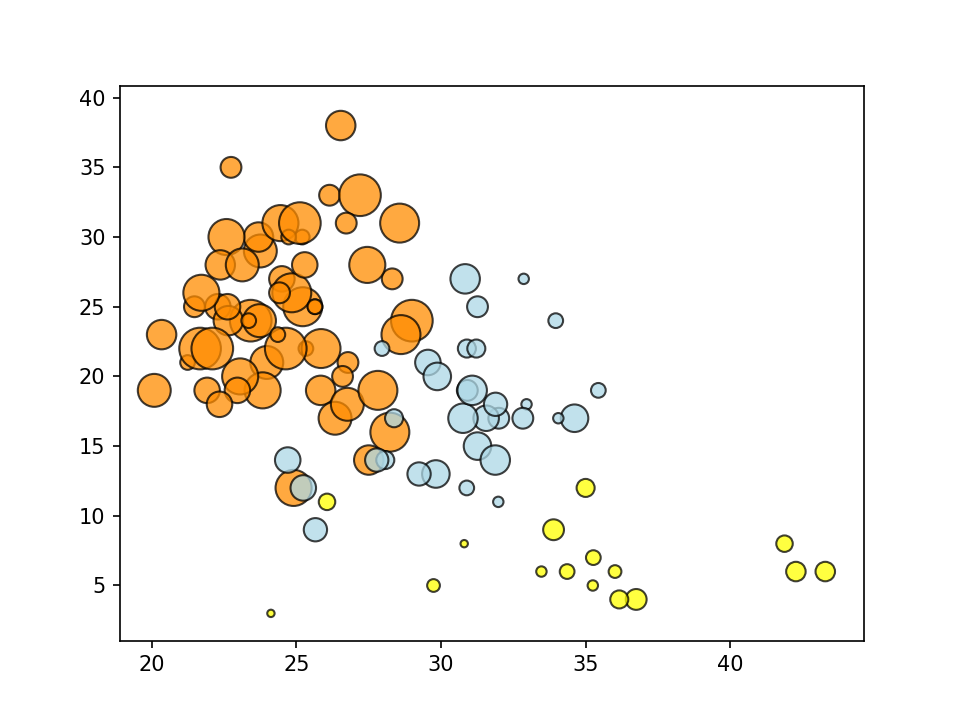

In [169]:
# Bubble Plot
plt.scatter(Urban["Average Fare"],Urban["Total Number of Rides"], marker="o", facecolors="darkorange", edgecolors="black",
            s = x_axis * 10, alpha=0.75)
plt.scatter(Suburban["Average Fare"],Suburban["Total Number of Rides"], marker="o", facecolors="lightblue", edgecolors="black",
            s = x_axis * 5, alpha=0.75)
plt.scatter(Rural["Average Fare"],Rural["Total Number of Rides"], marker="o", facecolors="yellow", edgecolors="black",
            s = x_axis * 2.5, alpha=0.75)
plt.show()